In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,PolynomialFeatures

In [5]:
df=pd.read_csv("D:\Sem 1 to 8 all\B.Tech\Sem 5\INT234 -PREDICTIVE ANALYTICS\data Sets\Position_Salaries.csv")
print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\vigneshvicky\AppData\Local\Temp\ipykernel_23904\3378560302.py:1: SyntaxWarning: invalid escape sequence '\S'
  df=pd.read_csv("D:\Sem 1 to 8 all\B.Tech\Sem 5\INT234 -PREDICTIVE ANALYTICS\data Sets\Position_Salaries.csv")


In [6]:
sc=StandardScaler()
df['Salary']=sc.fit_transform(df[['Salary']])
print(df)

            Position  Level    Salary
0   Business Analyst      1 -0.720043
1  Junior Consultant      2 -0.702438
2  Senior Consultant      3 -0.667228
3            Manager      4 -0.596808
4    Country Manager      5 -0.491178
5     Region Manager      6 -0.350339
6            Partner      7 -0.174289
7     Senior Partner      8  0.177810
8            C-level      9  0.882008
9                CEO     10  2.642503


In [7]:
ho=OneHotEncoder(sparse_output=False)
df['Position']=ho.fit_transform(df[['Position']])
print(df)

   Position  Level    Salary
0       1.0      1 -0.720043
1       0.0      2 -0.702438
2       0.0      3 -0.667228
3       0.0      4 -0.596808
4       0.0      5 -0.491178
5       0.0      6 -0.350339
6       0.0      7 -0.174289
7       0.0      8  0.177810
8       0.0      9  0.882008
9       0.0     10  2.642503


In [8]:
x=df.iloc[:,1:2].values
y=df.iloc[:,-1].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


                                                     Train Test                                                                                      

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

                                                      Linear regression                                                                              

In [10]:
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x)
print(y_predict)

[-1.41498282 -1.10553026 -0.7960777  -0.48662515 -0.17717259  0.13227996
  0.44173252  0.75118508  1.06063763  1.37009019]


                                                 Checking How our model work                                                                      

In [11]:
r2=r2_score(y,y_predict)
mse=mean_squared_error(y,y_predict)
mae=mean_absolute_error(y,y_predict)
rmse=np.sqrt(mse)

print(r2)
print(mse)
print(mae)
print(rmse)

0.6635126575685746
0.33648734243142525
0.47741290183165985
0.5800752903127535


                                        Applying Polynomial Regression                                                                               

In [12]:
poly = PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)

poly_model = LinearRegression()
poly_model.fit(x_poly, y)
# Predict using polynomial regression
y_poly_pred = poly_model.predict(x_poly)
# Compare results
print("\nPolynomial Regression Predictions:\n", y_poly_pred)


Polynomial Regression Predictions:
 [-0.69061886 -0.76666077 -0.6720085  -0.54528568 -0.44989475 -0.37401699
 -0.23061256  0.14257959  0.98304163  2.60347689]


                                     Again checking how our model Predicting                                                                         

In [13]:
r2=r2_score(y,y_poly_pred)
mse=mean_squared_error(y,y_poly_pred)
mae=mean_absolute_error(y,y_poly_pred)
rmse=np.sqrt(mse)

print(r2)
print(mse)
print(mae)
print(rmse)

0.9973922891706613
0.0026077108293386933
0.04465255935203266
0.05106575006145208


                                                Plotting  the graph                                                                                  

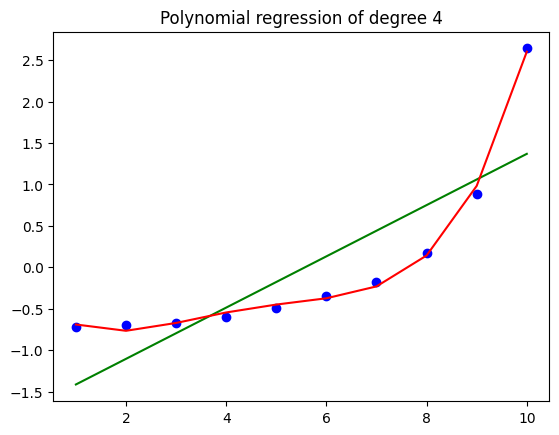

In [14]:
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_predict, color='green', label='Linear Regression')
plt.plot(x, y_poly_pred, color='red', label='Polynomial Regression')
plt.title('Polynomial regression of degree 4')
plt.show()